# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [24]:
#importer vos librairies 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df_price = pd.read_csv('price_availability.csv',";")
df_final = pd.read_csv('listings_final.csv',";")
df_price.listing_id = 

C:\Users\Vinsen\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Vinsen\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [21]:
#charger les données 
#price_availability.csv
#listings_final.csv
#vérifier si tous les individus ont bien un prix 
df = pd.merge(df_final,df_price,how = "outer", left_on='listing_id', right_on='listing_id')
df.head(40)

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,...,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor,day,created,available,local_currency,local_price,min_nights
0,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-10-28,2018-09-27 10:40:22.000+0000,False,EUR,47.0,1.0
1,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-10-28,2018-09-27 06:06:07.000+0000,False,EUR,47.0,1.0
2,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-10-28,2018-09-26 19:31:53.000+0000,False,EUR,47.0,1.0
3,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-09-01,2018-09-27 10:40:22.000+0000,True,EUR,47.0,1.0
4,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-09-01,2018-09-27 06:06:07.000+0000,True,EUR,47.0,1.0
5,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-09-01,2018-09-26 19:31:53.000+0000,True,EUR,47.0,1.0
6,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-11-29,2018-09-27 10:40:22.000+0000,False,EUR,47.0,1.0
7,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-11-29,2018-09-27 06:06:07.000+0000,False,EUR,47.0,1.0
8,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-11-29,2018-09-26 19:31:53.000+0000,False,EUR,47.0,1.0
9,0.0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1.0,1.0,...,False,False,1.0,1.0,2018-09-23,2018-09-27 10:40:22.000+0000,True,EUR,47.0,1.0


## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [13]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)
X = [df['beds'],df['person_capacity'],df['bedrooms'], df['bathrooms']]
Y = [df['local_price']]

In [20]:
#construire l'ensemble de donnée prix 
#
#    INDICE 
#
#itérer votre dataset d'ID 
#récupérer les prix des ID dans le dataset de prix 
#il y a plusieurs prix, faites des moyennes ;)  
df_price2 = df_price[['listing_id','local_price']].head(10)
df_price2

for index,row in df_final.iterrows():
    moyenne = 0
    cpt = 0
    for index,row2 in df_price2.iterrows():
        #print("df final : " + str(row['listing_id']) + " df_price "+  str(row2['listing_id']))
        if row['listing_id'] == row2['listing_id']:
            moyenne += row2['local_price'] 
            cpt += 1 
            print(moyenne + "le compteur : "+cpt)
            moyenne = moyenne / cpt
            row['prix'] = row2['local_price']


#df_final['prix'] = df_final['listing_id'].map(df_price.set_index('listing_id')['local_price'])



df final : 28581061 df_price 9810829
df final : 28581061 df_price 9810829
df final : 28581061 df_price 20897010
df final : 28581061 df_price 20897010
df final : 28581061 df_price 20897010
df final : 28581061 df_price 20897010
df final : 28581061 df_price 4290340
df final : 28581061 df_price 4290340
df final : 28581061 df_price 4290340
df final : 28581061 df_price 24574634
df final : 661961 df_price 9810829
df final : 661961 df_price 9810829
df final : 661961 df_price 20897010
df final : 661961 df_price 20897010
df final : 661961 df_price 20897010
df final : 661961 df_price 20897010
df final : 661961 df_price 4290340
df final : 661961 df_price 4290340
df final : 661961 df_price 4290340
df final : 661961 df_price 24574634
df final : 1261705 df_price 9810829
df final : 1261705 df_price 9810829
df final : 1261705 df_price 20897010
df final : 1261705 df_price 20897010
df final : 1261705 df_price 20897010
df final : 1261705 df_price 20897010
df final : 1261705 df_price 4290340
df final : 126

df final : 406852 df_price 20897010
df final : 406852 df_price 20897010
df final : 406852 df_price 20897010
df final : 406852 df_price 20897010
df final : 406852 df_price 4290340
df final : 406852 df_price 4290340
df final : 406852 df_price 4290340
df final : 406852 df_price 24574634
df final : 422409 df_price 9810829
df final : 422409 df_price 9810829
df final : 422409 df_price 20897010
df final : 422409 df_price 20897010
df final : 422409 df_price 20897010
df final : 422409 df_price 20897010
df final : 422409 df_price 4290340
df final : 422409 df_price 4290340
df final : 422409 df_price 4290340
df final : 422409 df_price 24574634
df final : 447208 df_price 9810829
df final : 447208 df_price 9810829
df final : 447208 df_price 20897010
df final : 447208 df_price 20897010
df final : 447208 df_price 20897010
df final : 447208 df_price 20897010
df final : 447208 df_price 4290340
df final : 447208 df_price 4290340
df final : 447208 df_price 4290340
df final : 447208 df_price 24574634
df fi

df final : 1110935 df_price 9810829
df final : 1110935 df_price 20897010
df final : 1110935 df_price 20897010
df final : 1110935 df_price 20897010
df final : 1110935 df_price 20897010
df final : 1110935 df_price 4290340
df final : 1110935 df_price 4290340
df final : 1110935 df_price 4290340
df final : 1110935 df_price 24574634
df final : 1117899 df_price 9810829
df final : 1117899 df_price 9810829
df final : 1117899 df_price 20897010
df final : 1117899 df_price 20897010
df final : 1117899 df_price 20897010
df final : 1117899 df_price 20897010
df final : 1117899 df_price 4290340
df final : 1117899 df_price 4290340
df final : 1117899 df_price 4290340
df final : 1117899 df_price 24574634
df final : 1126419 df_price 9810829
df final : 1126419 df_price 9810829
df final : 1126419 df_price 20897010
df final : 1126419 df_price 20897010
df final : 1126419 df_price 20897010
df final : 1126419 df_price 20897010
df final : 1126419 df_price 4290340
df final : 1126419 df_price 4290340
df final : 112

df final : 2063886 df_price 20897010
df final : 2063886 df_price 4290340
df final : 2063886 df_price 4290340
df final : 2063886 df_price 4290340
df final : 2063886 df_price 24574634
df final : 2158345 df_price 9810829
df final : 2158345 df_price 9810829
df final : 2158345 df_price 20897010
df final : 2158345 df_price 20897010
df final : 2158345 df_price 20897010
df final : 2158345 df_price 20897010
df final : 2158345 df_price 4290340
df final : 2158345 df_price 4290340
df final : 2158345 df_price 4290340
df final : 2158345 df_price 24574634
df final : 2158913 df_price 9810829
df final : 2158913 df_price 9810829
df final : 2158913 df_price 20897010
df final : 2158913 df_price 20897010
df final : 2158913 df_price 20897010
df final : 2158913 df_price 20897010
df final : 2158913 df_price 4290340
df final : 2158913 df_price 4290340
df final : 2158913 df_price 4290340
df final : 2158913 df_price 24574634
df final : 2162251 df_price 9810829
df final : 2162251 df_price 9810829
df final : 21622

df final : 3388237 df_price 20897010
df final : 3388237 df_price 20897010
df final : 3388237 df_price 20897010
df final : 3388237 df_price 4290340
df final : 3388237 df_price 4290340
df final : 3388237 df_price 4290340
df final : 3388237 df_price 24574634
df final : 3430844 df_price 9810829
df final : 3430844 df_price 9810829
df final : 3430844 df_price 20897010
df final : 3430844 df_price 20897010
df final : 3430844 df_price 20897010
df final : 3430844 df_price 20897010
df final : 3430844 df_price 4290340
df final : 3430844 df_price 4290340
df final : 3430844 df_price 4290340
df final : 3430844 df_price 24574634
df final : 3452604 df_price 9810829
df final : 3452604 df_price 9810829
df final : 3452604 df_price 20897010
df final : 3452604 df_price 20897010
df final : 3452604 df_price 20897010
df final : 3452604 df_price 20897010
df final : 3452604 df_price 4290340
df final : 3452604 df_price 4290340
df final : 3452604 df_price 4290340
df final : 3452604 df_price 24574634
df final : 347

df final : 6010678 df_price 20897010
df final : 6010678 df_price 4290340
df final : 6010678 df_price 4290340
df final : 6010678 df_price 4290340
df final : 6010678 df_price 24574634
df final : 6069917 df_price 9810829
df final : 6069917 df_price 9810829
df final : 6069917 df_price 20897010
df final : 6069917 df_price 20897010
df final : 6069917 df_price 20897010
df final : 6069917 df_price 20897010
df final : 6069917 df_price 4290340
df final : 6069917 df_price 4290340
df final : 6069917 df_price 4290340
df final : 6069917 df_price 24574634
df final : 6097562 df_price 9810829
df final : 6097562 df_price 9810829
df final : 6097562 df_price 20897010
df final : 6097562 df_price 20897010
df final : 6097562 df_price 20897010
df final : 6097562 df_price 20897010
df final : 6097562 df_price 4290340
df final : 6097562 df_price 4290340
df final : 6097562 df_price 4290340
df final : 6097562 df_price 24574634
df final : 6150694 df_price 9810829
df final : 6150694 df_price 9810829
df final : 61506

df final : 8647159 df_price 9810829
df final : 8647159 df_price 20897010
df final : 8647159 df_price 20897010
df final : 8647159 df_price 20897010
df final : 8647159 df_price 20897010
df final : 8647159 df_price 4290340
df final : 8647159 df_price 4290340
df final : 8647159 df_price 4290340
df final : 8647159 df_price 24574634
df final : 8711738 df_price 9810829
df final : 8711738 df_price 9810829
df final : 8711738 df_price 20897010
df final : 8711738 df_price 20897010
df final : 8711738 df_price 20897010
df final : 8711738 df_price 20897010
df final : 8711738 df_price 4290340
df final : 8711738 df_price 4290340
df final : 8711738 df_price 4290340
df final : 8711738 df_price 24574634
df final : 8734243 df_price 9810829
df final : 8734243 df_price 9810829
df final : 8734243 df_price 20897010
df final : 8734243 df_price 20897010
df final : 8734243 df_price 20897010
df final : 8734243 df_price 20897010
df final : 8734243 df_price 4290340
df final : 8734243 df_price 4290340
df final : 873

df final : 11769445 df_price 20897010
df final : 11769445 df_price 4290340
df final : 11769445 df_price 4290340
df final : 11769445 df_price 4290340
df final : 11769445 df_price 24574634
df final : 11957644 df_price 9810829
df final : 11957644 df_price 9810829
df final : 11957644 df_price 20897010
df final : 11957644 df_price 20897010
df final : 11957644 df_price 20897010
df final : 11957644 df_price 20897010
df final : 11957644 df_price 4290340
df final : 11957644 df_price 4290340
df final : 11957644 df_price 4290340
df final : 11957644 df_price 24574634
df final : 11960966 df_price 9810829
df final : 11960966 df_price 9810829
df final : 11960966 df_price 20897010
df final : 11960966 df_price 20897010
df final : 11960966 df_price 20897010
df final : 11960966 df_price 20897010
df final : 11960966 df_price 4290340
df final : 11960966 df_price 4290340
df final : 11960966 df_price 4290340
df final : 11960966 df_price 24574634
df final : 11984821 df_price 9810829
df final : 11984821 df_pri

df final : 14208656 df_price 9810829
df final : 14208656 df_price 20897010
df final : 14208656 df_price 20897010
df final : 14208656 df_price 20897010
df final : 14208656 df_price 20897010
df final : 14208656 df_price 4290340
df final : 14208656 df_price 4290340
df final : 14208656 df_price 4290340
df final : 14208656 df_price 24574634
df final : 14287488 df_price 9810829
df final : 14287488 df_price 9810829
df final : 14287488 df_price 20897010
df final : 14287488 df_price 20897010
df final : 14287488 df_price 20897010
df final : 14287488 df_price 20897010
df final : 14287488 df_price 4290340
df final : 14287488 df_price 4290340
df final : 14287488 df_price 4290340
df final : 14287488 df_price 24574634
df final : 14298796 df_price 9810829
df final : 14298796 df_price 9810829
df final : 14298796 df_price 20897010
df final : 14298796 df_price 20897010
df final : 14298796 df_price 20897010
df final : 14298796 df_price 20897010
df final : 14298796 df_price 4290340
df final : 14298796 df_p

df final : 15902750 df_price 24574634
df final : 15954352 df_price 9810829
df final : 15954352 df_price 9810829
df final : 15954352 df_price 20897010
df final : 15954352 df_price 20897010
df final : 15954352 df_price 20897010
df final : 15954352 df_price 20897010
df final : 15954352 df_price 4290340
df final : 15954352 df_price 4290340
df final : 15954352 df_price 4290340
df final : 15954352 df_price 24574634
df final : 15963836 df_price 9810829
df final : 15963836 df_price 9810829
df final : 15963836 df_price 20897010
df final : 15963836 df_price 20897010
df final : 15963836 df_price 20897010
df final : 15963836 df_price 20897010
df final : 15963836 df_price 4290340
df final : 15963836 df_price 4290340
df final : 15963836 df_price 4290340
df final : 15963836 df_price 24574634
df final : 15982715 df_price 9810829
df final : 15982715 df_price 9810829
df final : 15982715 df_price 20897010
df final : 15982715 df_price 20897010
df final : 15982715 df_price 20897010
df final : 15982715 df_p

df final : 17553179 df_price 24574634
df final : 17588647 df_price 9810829
df final : 17588647 df_price 9810829
df final : 17588647 df_price 20897010
df final : 17588647 df_price 20897010
df final : 17588647 df_price 20897010
df final : 17588647 df_price 20897010
df final : 17588647 df_price 4290340
df final : 17588647 df_price 4290340
df final : 17588647 df_price 4290340
df final : 17588647 df_price 24574634
df final : 17600058 df_price 9810829
df final : 17600058 df_price 9810829
df final : 17600058 df_price 20897010
df final : 17600058 df_price 20897010
df final : 17600058 df_price 20897010
df final : 17600058 df_price 20897010
df final : 17600058 df_price 4290340
df final : 17600058 df_price 4290340
df final : 17600058 df_price 4290340
df final : 17600058 df_price 24574634
df final : 17633726 df_price 9810829
df final : 17633726 df_price 9810829
df final : 17633726 df_price 20897010
df final : 17633726 df_price 20897010
df final : 17633726 df_price 20897010
df final : 17633726 df_p

df final : 19224034 df_price 20897010
df final : 19224034 df_price 20897010
df final : 19224034 df_price 4290340
df final : 19224034 df_price 4290340
df final : 19224034 df_price 4290340
df final : 19224034 df_price 24574634
df final : 19224902 df_price 9810829
df final : 19224902 df_price 9810829
df final : 19224902 df_price 20897010
df final : 19224902 df_price 20897010
df final : 19224902 df_price 20897010
df final : 19224902 df_price 20897010
df final : 19224902 df_price 4290340
df final : 19224902 df_price 4290340
df final : 19224902 df_price 4290340
df final : 19224902 df_price 24574634
df final : 19255212 df_price 9810829
df final : 19255212 df_price 9810829
df final : 19255212 df_price 20897010
df final : 19255212 df_price 20897010
df final : 19255212 df_price 20897010
df final : 19255212 df_price 20897010
df final : 19255212 df_price 4290340
df final : 19255212 df_price 4290340
df final : 19255212 df_price 4290340
df final : 19255212 df_price 24574634
df final : 19266707 df_pr

df final : 20721912 df_price 9810829
df final : 20721912 df_price 20897010
df final : 20721912 df_price 20897010
df final : 20721912 df_price 20897010
df final : 20721912 df_price 20897010
df final : 20721912 df_price 4290340
df final : 20721912 df_price 4290340
df final : 20721912 df_price 4290340
df final : 20721912 df_price 24574634
df final : 20741073 df_price 9810829
df final : 20741073 df_price 9810829
df final : 20741073 df_price 20897010
df final : 20741073 df_price 20897010
df final : 20741073 df_price 20897010
df final : 20741073 df_price 20897010
df final : 20741073 df_price 4290340
df final : 20741073 df_price 4290340
df final : 20741073 df_price 4290340
df final : 20741073 df_price 24574634
df final : 20796276 df_price 9810829
df final : 20796276 df_price 9810829
df final : 20796276 df_price 20897010
df final : 20796276 df_price 20897010
df final : 20796276 df_price 20897010
df final : 20796276 df_price 20897010
df final : 20796276 df_price 4290340
df final : 20796276 df_p

df final : 21888709 df_price 4290340
df final : 21888709 df_price 4290340
df final : 21888709 df_price 24574634
df final : 21905043 df_price 9810829
df final : 21905043 df_price 9810829
df final : 21905043 df_price 20897010
df final : 21905043 df_price 20897010
df final : 21905043 df_price 20897010
df final : 21905043 df_price 20897010
df final : 21905043 df_price 4290340
df final : 21905043 df_price 4290340
df final : 21905043 df_price 4290340
df final : 21905043 df_price 24574634
df final : 21907005 df_price 9810829
df final : 21907005 df_price 9810829
df final : 21907005 df_price 20897010
df final : 21907005 df_price 20897010
df final : 21907005 df_price 20897010
df final : 21907005 df_price 20897010
df final : 21907005 df_price 4290340
df final : 21907005 df_price 4290340
df final : 21907005 df_price 4290340
df final : 21907005 df_price 24574634
df final : 21918317 df_price 9810829
df final : 21918317 df_price 9810829
df final : 21918317 df_price 20897010
df final : 21918317 df_pri

df final : 23348731 df_price 9810829
df final : 23348731 df_price 9810829
df final : 23348731 df_price 20897010
df final : 23348731 df_price 20897010
df final : 23348731 df_price 20897010
df final : 23348731 df_price 20897010
df final : 23348731 df_price 4290340
df final : 23348731 df_price 4290340
df final : 23348731 df_price 4290340
df final : 23348731 df_price 24574634
df final : 23363047 df_price 9810829
df final : 23363047 df_price 9810829
df final : 23363047 df_price 20897010
df final : 23363047 df_price 20897010
df final : 23363047 df_price 20897010
df final : 23363047 df_price 20897010
df final : 23363047 df_price 4290340
df final : 23363047 df_price 4290340
df final : 23363047 df_price 4290340
df final : 23363047 df_price 24574634
df final : 23385994 df_price 9810829
df final : 23385994 df_price 9810829
df final : 23385994 df_price 20897010
df final : 23385994 df_price 20897010
df final : 23385994 df_price 20897010
df final : 23385994 df_price 20897010
df final : 23385994 df_p

df final : 24674724 df_price 9810829
df final : 24674724 df_price 9810829
df final : 24674724 df_price 20897010
df final : 24674724 df_price 20897010
df final : 24674724 df_price 20897010
df final : 24674724 df_price 20897010
df final : 24674724 df_price 4290340
df final : 24674724 df_price 4290340
df final : 24674724 df_price 4290340
df final : 24674724 df_price 24574634
df final : 24767194 df_price 9810829
df final : 24767194 df_price 9810829
df final : 24767194 df_price 20897010
df final : 24767194 df_price 20897010
df final : 24767194 df_price 20897010
df final : 24767194 df_price 20897010
df final : 24767194 df_price 4290340
df final : 24767194 df_price 4290340
df final : 24767194 df_price 4290340
df final : 24767194 df_price 24574634
df final : 24721585 df_price 9810829
df final : 24721585 df_price 9810829
df final : 24721585 df_price 20897010
df final : 24721585 df_price 20897010
df final : 24721585 df_price 20897010
df final : 24721585 df_price 20897010
df final : 24721585 df_p

df final : 25792643 df_price 20897010
df final : 25792643 df_price 20897010
df final : 25792643 df_price 20897010
df final : 25792643 df_price 4290340
df final : 25792643 df_price 4290340
df final : 25792643 df_price 4290340
df final : 25792643 df_price 24574634
df final : 25802009 df_price 9810829
df final : 25802009 df_price 9810829
df final : 25802009 df_price 20897010
df final : 25802009 df_price 20897010
df final : 25802009 df_price 20897010
df final : 25802009 df_price 20897010
df final : 25802009 df_price 4290340
df final : 25802009 df_price 4290340
df final : 25802009 df_price 4290340
df final : 25802009 df_price 24574634
df final : 25876312 df_price 9810829
df final : 25876312 df_price 9810829
df final : 25876312 df_price 20897010
df final : 25876312 df_price 20897010
df final : 25876312 df_price 20897010
df final : 25876312 df_price 20897010
df final : 25876312 df_price 4290340
df final : 25876312 df_price 4290340
df final : 25876312 df_price 4290340
df final : 25876312 df_pr

df final : 26760709 df_price 9810829
df final : 26760709 df_price 9810829
df final : 26760709 df_price 20897010
df final : 26760709 df_price 20897010
df final : 26760709 df_price 20897010
df final : 26760709 df_price 20897010
df final : 26760709 df_price 4290340
df final : 26760709 df_price 4290340
df final : 26760709 df_price 4290340
df final : 26760709 df_price 24574634
df final : 26760757 df_price 9810829
df final : 26760757 df_price 9810829
df final : 26760757 df_price 20897010
df final : 26760757 df_price 20897010
df final : 26760757 df_price 20897010
df final : 26760757 df_price 20897010
df final : 26760757 df_price 4290340
df final : 26760757 df_price 4290340
df final : 26760757 df_price 4290340
df final : 26760757 df_price 24574634
df final : 26766239 df_price 9810829
df final : 26766239 df_price 9810829
df final : 26766239 df_price 20897010
df final : 26766239 df_price 20897010
df final : 26766239 df_price 20897010
df final : 26766239 df_price 20897010
df final : 26766239 df_p

df final : 27822870 df_price 4290340
df final : 27822870 df_price 4290340
df final : 27822870 df_price 4290340
df final : 27822870 df_price 24574634
df final : 27843624 df_price 9810829
df final : 27843624 df_price 9810829
df final : 27843624 df_price 20897010
df final : 27843624 df_price 20897010
df final : 27843624 df_price 20897010
df final : 27843624 df_price 20897010
df final : 27843624 df_price 4290340
df final : 27843624 df_price 4290340
df final : 27843624 df_price 4290340
df final : 27843624 df_price 24574634
df final : 27915761 df_price 9810829
df final : 27915761 df_price 9810829
df final : 27915761 df_price 20897010
df final : 27915761 df_price 20897010
df final : 27915761 df_price 20897010
df final : 27915761 df_price 20897010
df final : 27915761 df_price 4290340
df final : 27915761 df_price 4290340
df final : 27915761 df_price 4290340
df final : 27915761 df_price 24574634
df final : 27918931 df_price 9810829
df final : 27918931 df_price 9810829
df final : 27918931 df_pric

En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10,20 ou 30\%$.

In [5]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
#zafficher la shape de vos données 




((699, 4), (699,), (300, 4), (300,))

## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [6]:
#créer l'objet de régression et entrainer le sur notre ensemble d'entraînement


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [7]:
#afficher les coefficients
#que remarquez vous ? 


Coefficients beta_j : 
 [2.47834609e-06 3.23451085e+01 1.43887639e+01 7.75318453e+01]
Coefficients INTERCEPT beta_0 : 
 -79.79953133672862


## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [8]:
#faire une prediction sur X


taille du vecteur Y_pred : 999 


In [9]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2


Mean squared error: 21320.77
R2 : 0.37


## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

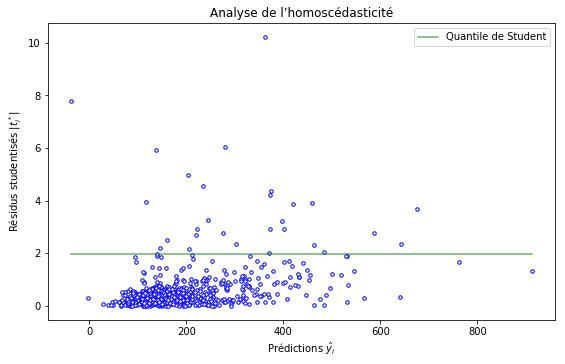

In [10]:
#analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()